In [49]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.model_selection import GridSearchCV 
from sklearn_pandas import DataFrameMapper
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold

# 2.0: Loading Data

In [50]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data3 = data.drop(['Churn'], axis=1)
df = data.select_dtypes(exclude=['object'])
categ = data.select_dtypes(exclude=['int64','float64'])
cont_name = list(df)
categ = categ.drop(['Churn'], axis=1)
categ_name = list(categ)
target = data['Churn']
all_features = data.drop(['Churn'], axis=1)
df2 = pd.concat([categ, df], axis = 1)
dep = pd.concat([df, target], axis = 1)


# 2.1: Visualize the Univariate Distribution  & the Target Feature

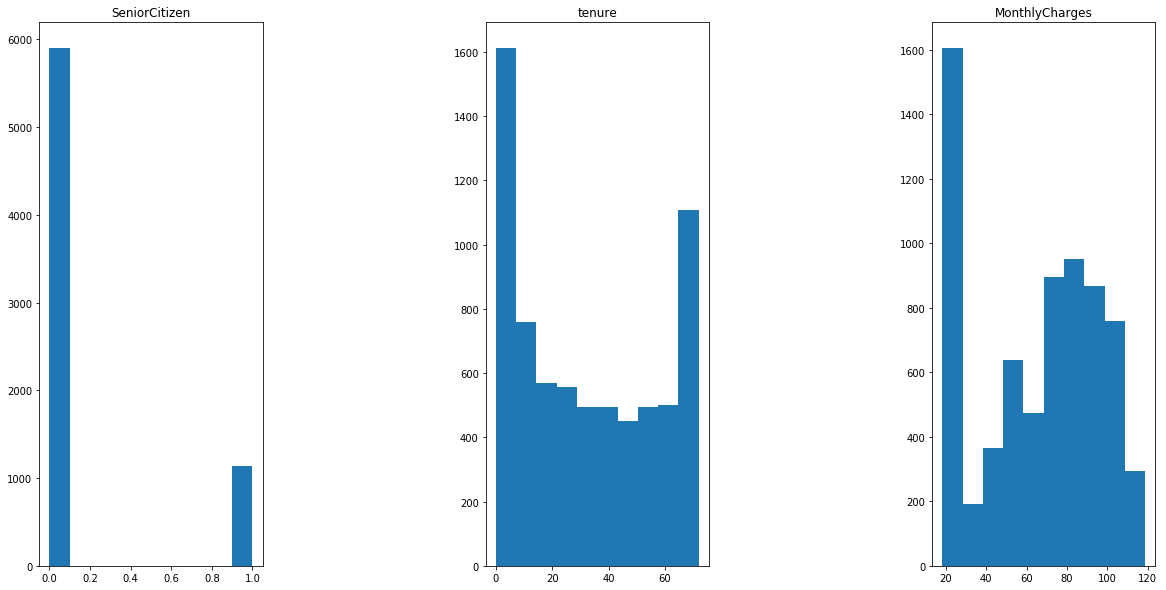

In [51]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=1)
for i in range(len(df.columns)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(df.iloc[:,i])
    ax.set_title(list(df)[i])

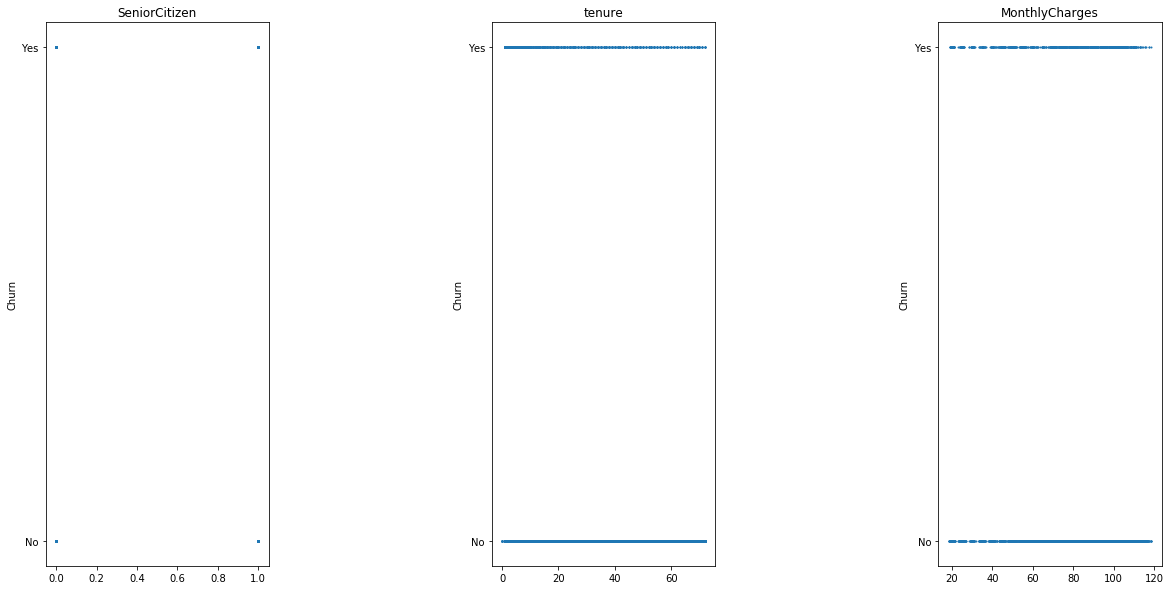

In [52]:
# Visualize the target feature with each continuous variables
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=1)
for i in range(df.shape[1]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(df.iloc[:,i],target,s=1)
    ax.set_title(list(df)[i])
    ax.set_ylabel("Churn")

# 2.2: Split Data & Evaluate Models

In [53]:
# Create a pipeline with all categorical features for logistic regression
logistic = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('logistic',LogisticRegression())])

# Create a pipeline with all categorical features for SVC
SVC = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('SVC',LinearSVC())])

# Create a pipeline with all categorical features for Nearest Centroid
NC = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore')),
    ('NC',NearestCentroid())])


# Split data into the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(data3, target, test_size=0.3)

# Fit the logistic regression and evaluate cross validation scores
logistic.fit(X_train, y_train)

scores = cross_val_score(logistic,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Logistic Regression Scores:")
print(scores)
print("")


# Fit the SVC and evaluate cross validation scores
SVC.fit(X_train, y_train)

scores = cross_val_score(SVC,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("SVC Scores:")
print(scores)
print("")


# Fit the Nearest Centroid and evaluate cross validation scores
NC.fit(X_train, y_train)

scores = cross_val_score(NC,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Nearest Centroid Scores:")
print(scores)



Logistic Regression Scores:
0.7886399278514022

SVC Scores:
0.7772816821246123

Nearest Centroid Scores:
0.7002006349037107


In [54]:
# Create a pipeline with all features and take column trasformation on all features
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value = 'missing')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer, cont_name),
        ('cat', categorical_transformer, categ_name)])

# Create a classifier instance for Logistic Regression 
clf1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression())])

# Create a classifier instance for SVC
clf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('SVC', LinearSVC())])

# Create a classifier instance for Nearest Centroid
clf3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('NC', NearestCentroid())])


In [55]:
# Split the whole dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(data3, target, test_size=0.3)

# Fit Logistic model and evaluate cross validation scores
clf1.fit(X_train, y_train)
scores = cross_val_score(clf1,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Logistic Regression Scores After Scaling the Continuous features:")
print(scores)
print("")

# Fit SVC model and evaluate cross validation scores
clf2.fit(X_train, y_train)

scores = cross_val_score(clf2,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("SVC Scores After Scaling the Continuous features:")
print(scores)
print("")

# Fit Nearest Centroid model and evaluate cross validation scores
clf3.fit(X_train, y_train)

scores = cross_val_score(clf3,X_train,y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Nearest Centroid Scores After Scaling the Continuous features:")
print(scores)



Logistic Regression Scores After Scaling the Continuous features:
0.8020261920214798

SVC Scores After Scaling the Continuous features:
0.8010128984394834

Nearest Centroid Scores After Scaling the Continuous features:
0.7186656926403718


# 2.3: Tune the Parameter by the GridSearchCV

In [56]:
# Search for the best tuning parameter by the GridSearchCV for Logistic Regression
C_param_range = {'logistic__C': [0.01,0.1, 1, 10, 100]}

logistic_grid = GridSearchCV(clf1, param_grid= C_param_range, cv=5)
logistic_grid.fit(X_train, y_train)

print("best mean cross-validation score of Logistic Regression: {:.3f}".format(logistic_grid.best_score_))
print("best parameters of Logistic Regression: {}".format(logistic_grid.best_params_))
print("test-set score of Logistic Regression: {:.3f}".format(logistic_grid.score(X_test, y_test)))
print("")


# Search for the best tuning parameter by the GridSearchCV for SVC
C_param_range = {'SVC__C': [0.01,0.1, 1, 10, 100]}

SVC_grid = GridSearchCV(clf2, param_grid= C_param_range, cv=5)
SVC_grid.fit(X_train, y_train)

print("best mean cross-validation score of SVC: {:.3f}".format(SVC_grid.best_score_))
print("best parameters of SVC: {}".format(SVC_grid.best_params_))
print("test-set score of SVC: {:.3f}".format(SVC_grid.score(X_test, y_test)))
print("")


# Search for the best tuning parameter by the GridSearchCV for Nearest Centroid
shrink_threshold_param_range = {'NC__shrink_threshold': [0.01,0.1, 1, 10, 100,1000]}

NC_grid = GridSearchCV(clf3, param_grid= shrink_threshold_param_range, cv=5)
NC_grid.fit(X_train, y_train)

print("best mean cross-validation score of SVC: {:.3f}".format(NC_grid.best_score_))
print("best parameters of SVC: {}".format(NC_grid.best_params_))
print("test-set score of SVC: {:.3f}".format(NC_grid.score(X_test, y_test)))



best mean cross-validation score of Logistic Regression: 0.805
best parameters of Logistic Regression: {'logistic__C': 0.01}
test-set score of Logistic Regression: 0.803

best mean cross-validation score of SVC: 0.804
best parameters of SVC: {'SVC__C': 0.1}
test-set score of SVC: 0.801

best mean cross-validation score of SVC: 0.740
best parameters of SVC: {'NC__shrink_threshold': 100}
test-set score of SVC: 0.723


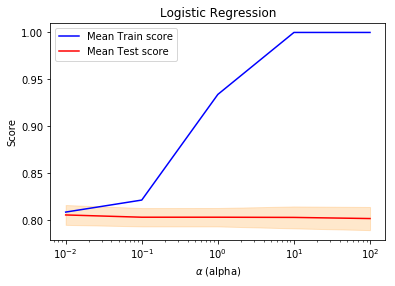

In [57]:
# Visualize the performance of Logistic Regression
logistic_C = [0.01,0.1, 1, 10, 100]

train_scores_mean = logistic_grid.cv_results_["mean_train_score"]
train_scores_std = logistic_grid.cv_results_["std_train_score"]
test_scores_mean = logistic_grid.cv_results_["mean_test_score"]
test_scores_std = logistic_grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Logistic Regression')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(logistic_C, train_scores_mean, label='Mean Train score',
             color='blue')

plt.semilogx(logistic_C, test_scores_mean,
             label='Mean Test score', color='red')


plt.gca().fill_between(logistic_C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')

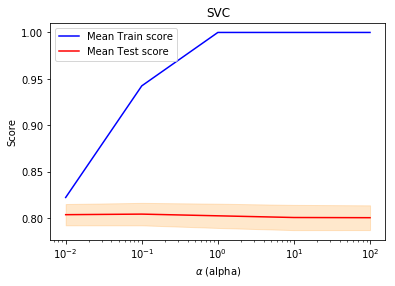

In [58]:
# Visualize the performance of SVC
SVC_C = [0.01,0.1, 1, 10, 100]

train_scores_mean = SVC_grid.cv_results_["mean_train_score"]
train_scores_std = SVC_grid.cv_results_["std_train_score"]
test_scores_mean = SVC_grid.cv_results_["mean_test_score"]
test_scores_std = SVC_grid.cv_results_["std_test_score"]

plt.figure()
plt.title('SVC')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(SVC_C, train_scores_mean, label='Mean Train score',
             color='blue')

plt.semilogx(SVC_C, test_scores_mean,
             label='Mean Test score', color='red')


plt.gca().fill_between(SVC_C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')

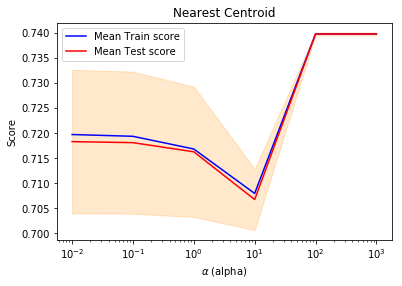

In [59]:
# Visualize the performance of Nearest Centroid
NC_C = [0.01,0.1, 1, 10, 100,1000]

train_scores_mean = NC_grid.cv_results_["mean_train_score"]
train_scores_std = NC_grid.cv_results_["std_train_score"]
test_scores_mean = NC_grid.cv_results_["mean_test_score"]
test_scores_std = NC_grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Nearest Centroid')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(NC_C, train_scores_mean, label='Mean Train score',
             color='blue')

plt.semilogx(NC_C, test_scores_mean,
             label='Mean Test score', color='red')


plt.gca().fill_between(NC_C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')

# Conclusion on 2.3

Overall, the mean train score get better and better for Rogistic Regression and SVC as the alpha increases. However, the mean test scores for both pretty much stagnate regardless of the alpha. For Nearest Centroid, the mean train score and mean test score behave almost the same. An interesting pattern is that apparently as the alpha increases, both scores increase as well. However, an alpha bigger than 10^2 no longer improves the scores.

# 2.4: Change the Cross-Validation Strategy

In [60]:
# Search for the best tuning parameter by the GridSearchCV with Shuffle for Logistic Regression
C_param_range = {'logistic__C': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=5,random_state=None, shuffle=True)
logistic_grid = GridSearchCV(clf1, param_grid= C_param_range, cv=k_fold)
logistic_grid.fit(data3.iloc[train], target.iloc[train])

    

print("best mean cross-validation score of Logistic Regression with shuffle: {:.3f}".format(logistic_grid.best_score_))
print("best parameters of Logistic Regression with shuffle: {}".format(logistic_grid.best_params_))
print("test-set score of Logistic Regression with shuffle: {:.3f}".format(logistic_grid.score(X_test, y_test)))
print("")

# Search for the best tuning parameter by the GridSearchCV with Shuffle for SVC
C_param_range = {'SVC__C': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=2,random_state=None, shuffle=True)
SVC_grid = GridSearchCV(clf2, param_grid= C_param_range, cv=k_fold)
SVC_grid.fit(data3.iloc[train], target.iloc[train])

print("best mean cross-validation score of SVC with shuffle: {:.3f}".format(SVC_grid.best_score_))
print("best parameters of SVC with shuffle: {}".format(SVC_grid.best_params_))
print("test-set score of SVC with shuffle: {:.3f}".format(SVC_grid.score(X_test, y_test)))
print("")


# Search for the best tuning parameter by the GridSearchCV with Shuffle for Nearest Centroid
shrink_threshold_param_range = {'NC__shrink_threshold': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=2,random_state=None, shuffle=True)
NC_grid = GridSearchCV(clf3, param_grid= shrink_threshold_param_range, cv=k_fold)
NC_grid.fit(data3.iloc[train], target.iloc[train])

print("best mean cross-validation score of Nearest Centroid with shuffle: {:.3f}".format(NC_grid.best_score_))
print("best parameters of Nearest Centroid with shuffle: {}".format(NC_grid.best_params_))
print("test-set score of Nearest Centroid with shuffle: {:.3f}".format(NC_grid.score(X_test, y_test)))

best mean cross-validation score of Logistic Regression with shuffle: 0.804
best parameters of Logistic Regression with shuffle: {'logistic__C': 0.01}
test-set score of Logistic Regression with shuffle: 0.804

best mean cross-validation score of SVC with shuffle: 0.806
best parameters of SVC with shuffle: {'SVC__C': 0.01}
test-set score of SVC with shuffle: 0.818

best mean cross-validation score of Nearest Centroid with shuffle: 0.737
best parameters of Nearest Centroid with shuffle: {'NC__shrink_threshold': 100}
test-set score of Nearest Centroid with shuffle: 0.723


In [61]:
# Search for the best tuning parameter by the GridSearchCV with Shuffle and Random State for Logistic Regression
C_param_range = {'logistic__C': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=2,random_state=123, shuffle=True)
logistic_grid = GridSearchCV(clf1, param_grid= C_param_range, cv=k_fold)
logistic_grid.fit(data3.iloc[train], target.iloc[train])

print("best mean cross-validation score of Logistic Regression with shuffle: {:.3f}".format(logistic_grid.best_score_))
print("best parameters of Logistic Regression with shuffle: {}".format(logistic_grid.best_params_))
print("test-set score of Logistic Regression with shuffle: {:.3f}".format(logistic_grid.score(X_test, y_test)))
print("")


# Search for the best tuning parameter by the GridSearchCV with Shuffle and Random State for SVC
C_param_range = {'SVC__C': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=2,random_state=None, shuffle=True)
SVC_grid = GridSearchCV(clf2, param_grid= C_param_range, cv=k_fold)
SVC_grid.fit(data3.iloc[train], target.iloc[train])

print("best mean cross-validation score of SVC with shuffle: {:.3f}".format(SVC_grid.best_score_))
print("best parameters of SVC with shuffle: {}".format(SVC_grid.best_params_))
print("test-set score of SVC with shuffle: {:.3f}".format(SVC_grid.score(X_test, y_test)))
print("")

# Search for the best tuning parameter by the GridSearchCV with Shuffle and Random State for Nearest Centroid
shrink_threshold_param_range = {'NC__shrink_threshold': [0.01,0.1, 1, 10, 100]}
k_fold = KFold(n_splits=2,random_state=None, shuffle=True)
NC_grid = GridSearchCV(clf3, param_grid= shrink_threshold_param_range, cv=k_fold)
NC_grid.fit(data3.iloc[train], target.iloc[train])

print("best mean cross-validation score of Nearest Centroid with shuffle: {:.3f}".format(NC_grid.best_score_))
print("best parameters of Nearest Centroid with shuffle: {}".format(NC_grid.best_params_))
print("test-set score of Nearest Centroid with shuffle: {:.3f}".format(NC_grid.score(X_test, y_test)))

best mean cross-validation score of Logistic Regression with shuffle: 0.802
best parameters of Logistic Regression with shuffle: {'logistic__C': 0.1}
test-set score of Logistic Regression with shuffle: 0.815

best mean cross-validation score of SVC with shuffle: 0.805
best parameters of SVC with shuffle: {'SVC__C': 0.1}
test-set score of SVC with shuffle: 0.912

best mean cross-validation score of Nearest Centroid with shuffle: 0.737
best parameters of Nearest Centroid with shuffle: {'NC__shrink_threshold': 100}
test-set score of Nearest Centroid with shuffle: 0.723


# 2.5: Visualize the Coefficients

In [62]:
# Instantiate an instance for Logistic Regression and SVC with the best parameter obtained by the GridSearch CV
clf1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(C=1))])

clf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('SVC', LinearSVC(C=0.1))])


In [65]:
# Shape of Logistic coefficients
logistic_grid.best_estimator_.steps[1][1].coef_.shape

(1, 10970)

Text(0.5, 1.0, 'Logistic Coefficients')

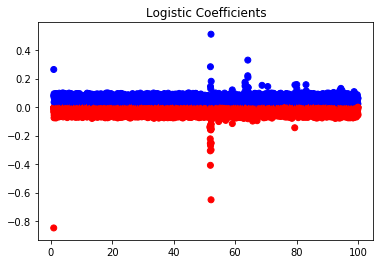

In [66]:
# Plot coefficients of Logistic Regression
logistic = clf1.fit(X_train,y_train)
plt.scatter(np.linspace(1,100,10970),logistic_grid.best_estimator_.steps[1][1].coef_,c=np.sign(logistic_grid.best_estimator_.steps[1][1].coef_), cmap="bwr_r")
plt.title('Logistic Coefficients')

In [67]:
# Shape of SVC coefficients
logistic_grid.best_estimator_.steps[1][1].coef_.shape

(1, 10970)

Text(0.5, 1.0, 'SVC Coefficients')

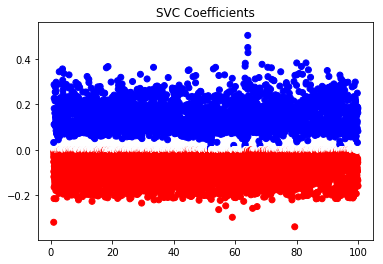

In [68]:
# Plot coefficients of SVC
SVC = clf2.fit(X_train,y_train)
plt.scatter(np.linspace(1,100,10970),SVC_grid.best_estimator_.steps[1][1].coef_,c=np.sign(SVC_grid.best_estimator_.steps[1][1].coef_), cmap="bwr_r")
plt.title('SVC Coefficients')